<h1>The Battle of Neighborhoods - Scarborough, Toronto</h1>

In [1]:
!pip install geocoder
!pip install folium

     |████████████████████████████████| 98 kB 6.2 MB/s  eta 0:00:01
     |████████████████████████████████| 94 kB 5.0 MB/s  eta 0:00:01


In [2]:
import pandas as pd
import requests
import numpy as np
import geocoder
import folium
import requests 
import matplotlib.cm as cm
import matplotlib.colors as colors
import json
import xml
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from pandas.io.json import json_normalize 
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim 
from bs4 import BeautifulSoup

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print('Libs imported!')

Libs imported!


<h2>Data Pre-processing</h2>

</h3>Web Scraping</h3>

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
extracting_data = requests.get(url).text
wiki_data = BeautifulSoup(extracting_data, 'lxml')

In [18]:
column_names = ['Postalcode','Borough','Neighborhood']
toronto = pd.DataFrame(columns = column_names)

content = wiki_data.find('div', class_='mw-parser-output')
table = content.table.tbody
postcode = 0
borough = 0
neighborhood = 0

for tr in table.find_all('tr'):
    i = 0
    for td in tr.find_all('td'):
        if i == 0:
            postcode = td.text.replace('\n','')
            i = i + 1
        elif i == 1:
            borough = td.text.replace('\n','')
            i = i + 1
        elif i == 2: 
            neighborhood = td.text.strip('\n').replace(']','')
    toronto = toronto.append({'Postalcode': postcode,'Borough': borough,'Neighborhood': neighborhood},ignore_index=True)

In [19]:
toronto

,Postalcode,Borough,Neighborhood
0,0,0,0
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,"Regent Park, Harbourfront"
6,M6A,North York,"Lawrence Manor, Lawrence Heights"
7,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M8A,Not assigned,Not assigned
9,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"


In [20]:
toronto.dtypes

Postalcode      object
Borough         object
Neighborhood    object
dtype: object

In [27]:
toronto

,Postalcode,Borough,Neighborhood
0,0,0,0
4,M4A,North York,Victoria Village
7,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M8A,Not assigned,Not assigned
11,M2B,Not assigned,Not assigned
12,M3B,North York,Don Mills
15,M6B,North York,Glencairn
16,M7B,Not assigned,Not assigned
17,M8B,Not assigned,Not assigned
18,M9B,Etobicoke,"West Deane Park, Princess Gardens, Martin Grov..."


In [28]:
toronto = toronto[toronto.Borough!='Not assigned']
toronto = toronto[toronto.Borough!= 0]
toronto.reset_index(drop = True, inplace = True)
i = 0
for i in range(0,toronto.shape[0]):
    if toronto.iloc[i][2] == 'Not assigned':
        toronto.iloc[i][2] = toronto.iloc[i][1]
        i = i+1

In [29]:
df = toronto.groupby(['Postalcode','Borough'])['Neighborhood'].apply(', '.join).reset_index()
df.head()

,Postalcode,Borough,Neighborhood
0,M1E,Scarborough,"Guildwood, Morningside, West Hill"
1,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
2,M1P,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town..."
3,M1T,Scarborough,"Clarks Corners, Tam O'Shanter, Sullivan"
4,M1W,Scarborough,"Steeles West, L'Amoreaux West"


In [30]:
df.shape

(55, 3)

In [31]:
df = df.dropna()
empty = 'Not assigned'
df = df[(df.Postalcode != empty ) & (df.Borough != empty) & (df.Neighborhood != empty)]

In [32]:
df.shape

(55, 3)

In [33]:
def neighborhood_list(grouped):    
    return ', '.join(sorted(grouped['Neighborhood'].tolist()))
                    
grp = df.groupby(['Postalcode', 'Borough'])
df_2 = grp.apply(neighborhood_list).reset_index(name='Neighborhood')

In [34]:
df_2.shape

(55, 3)

In [35]:
df_2.head()

,Postalcode,Borough,Neighborhood
0,M1E,Scarborough,"Guildwood, Morningside, West Hill"
1,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
2,M1P,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town..."
3,M1T,Scarborough,"Clarks Corners, Tam O'Shanter, Sullivan"
4,M1W,Scarborough,"Steeles West, L'Amoreaux West"


In [37]:
def get_latilong(postal_code):
    lati_long_coords = None
    while(lati_long_coords is None):
        g = geocoder.arcgis('{}, Toronto, Ontario'.format(postal_code))
        lati_long_coords = g.latlng
    return lati_long_coords
    
get_latilong('M1E')

[43.765750000000025, -79.17469999999997]

In [38]:
postal_codes = df_2['Postalcode']    
coords = [ get_latilong(postal_code) for postal_code in postal_codes.tolist() ]

In [39]:
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
df_2['Latitude'] = df_coords['Latitude']
df_2['Longitude'] = df_coords['Longitude']

In [40]:
df_2.head()

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.76575,-79.17470
1,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.72360,-79.23496
2,M1P,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",43.75998,-79.26940
3,M1T,Scarborough,"Clarks Corners, Tam O'Shanter, Sullivan",43.78491,-79.29722
4,M1W,Scarborough,"Steeles West, L'Amoreaux West",43.80079,-79.32162


In [42]:
address = 'Scarborough,Toronto'

geolocator = Nominatim(user_agent="coursera")
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude
print('The Geograpical Co-ordinate of Seattle,Washington are {}, {}.'.format(latitude_x, longitude_y))

The Geograpical Co-ordinate of Seattle,Washington are 43.7729744, -79.2576479.


In [43]:
map_Scarborough = folium.Map(location=[latitude_x, longitude_y], zoom_start=10)

for lat, lng, nei in zip(df_2['Latitude'], df_2['Longitude'], df_2['Neighborhood']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Scarborough)  
    
map_Scarborough

In [44]:
address = 'Scarborough,Toronto'

geolocator = Nominatim(user_agent='coursera')
location = geolocator.geocode(address)
latitude_n1 = location.latitude
longitude_n1 = location.longitude
print('The Geograpical Co-ordinate of Neighborhood_1 are {}, {}.'.format(latitude_x, longitude_y))

The Geograpical Co-ordinate of Neighborhood_1 are 43.7729744, -79.2576479.


In [45]:
CLIENT_ID = 'WBNABJ4BHVOBAR4CDNGAEGWCPCLQY0RH0IWNK4DJ1DU4HEIK' # your Foursquare ID
CLIENT_SECRET = '1PJUYLKOPUS55UPJT2WLCHCZSHXVXSOJXORU3Q54MXDPT1A1' # your Foursquare Secret
ACCESS_TOKEN = 'MCDDO2LPS334AEAESGW3ODQAB2E2S3JQJGLABTCGUTWSNF0E' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WBNABJ4BHVOBAR4CDNGAEGWCPCLQY0RH0IWNK4DJ1DU4HEIK
CLIENT_SECRET:1PJUYLKOPUS55UPJT2WLCHCZSHXVXSOJXORU3Q54MXDPT1A1


In [47]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_n1, 
    longitude_n1, 
    500, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=WBNABJ4BHVOBAR4CDNGAEGWCPCLQY0RH0IWNK4DJ1DU4HEIK&client_secret=1PJUYLKOPUS55UPJT2WLCHCZSHXVXSOJXORU3Q54MXDPT1A1&v=20180604&ll=43.7729744,-79.2576479&radius=500&limit=30'

In [48]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6030ccec9854e8099cf64242'},
 'response': {'headerLocation': 'Scarborough City Centre',
  'headerFullLocation': 'Scarborough City Centre, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 42,
  'suggestedBounds': {'ne': {'lat': 43.777474404500005,
    'lng': -79.25142759021877},
   'sw': {'lat': 43.7684743955, 'lng': -79.26386820978122}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5085ec39e4b0b1ead2eb0818',
       'name': 'Disney Store',
       'location': {'address': '300 Borough Drive',
        'crossStreet': 'in Scarborough Town Centre',
        'lat': 43.775537,
        'lng': -79.256833,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.775537,
          'lng': -79.256833}],
        

In [49]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [50]:
venues = results['response']['groups'][0]['items']

In [51]:
nearby_venues = json_normalize(venues) 
nearby_venues

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.neighborhood,venue.venuePage.id
0,e-0-5085ec39e4b0b1ead2eb0818-0,0,"[{'summary': 'This spot is popular', 'type': '...",5085ec39e4b0b1ead2eb0818,Disney Store,300 Borough Drive,in Scarborough Town Centre,43.775537,-79.256833,"[{'label': 'display', 'lat': 43.775537, 'lng':...",292,M1P 4P5,CA,Scarborough,ON,Canada,[300 Borough Drive (in Scarborough Town Centre...,"[{'id': '4bf58dd8d48988d1f3941735', 'name': 'T...",0,[],NaN,NaN
1,e-0-4c059bcd7083952134097bce-1,0,"[{'summary': 'This spot is popular', 'type': '...",4c059bcd7083952134097bce,SEPHORA,300 Borough Drive,at Scarborough Town Centre,43.775017,-79.258109,"[{'label': 'display', 'lat': 43.77501688366838...",230,M1P 4P5,CA,Scarborough,ON,Canada,[300 Borough Drive (at Scarborough Town Centre...,"[{'id': '4bf58dd8d48988d10c951735', 'name': 'C...",0,[],NaN,NaN
2,e-0-4b2d1251f964a520a4cd24e3-2,0,"[{'summary': 'This spot is popular', 'type': '...",4b2d1251f964a520a4cd24e3,St. Andrews Fish & Chips,1589 Ellesmere Rd.,NaN,43.771865,-79.252645,"[{'label': 'display', 'lat': 43.77186461230185...",420,M1P 2Y3,CA,Toronto,ON,Canada,"[1589 Ellesmere Rd., Toronto ON M1P 2Y3, Canada]","[{'id': '4edd64a0c7ddd24ca188df1a', 'name': 'F...",0,[],Bendale,NaN
3,e-0-4d1127d65f3376eb86661386-3,0,"[{'summary': 'This spot is popular', 'type': '...",4d1127d65f3376eb86661386,Tommy Hilfiger,300 Borough Dr,NaN,43.776015,-79.257369,"[{'label': 'display', 'lat': 43.77601546103458...",339,M1P 4P5,CA,Scarborough,ON,Canada,"[300 Borough Dr, Scarborough ON M1P 4P5, Canada]","[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",0,[],Scarborough City Centre,NaN
4,e-0-4c3c8e1f282203bb4ca3fcda-4,0,"[{'summary': 'This spot is popular', 'type': '...",4c3c8e1f282203bb4ca3fcda,American Eagle Store,300 Borough Drive,in Scarborough Town Centre,43.776012,-79.258334,"[{'label': 'display', 'lat': 43.7760116, 'lng'...",342,M1P 4P5,CA,Scarborough,ON,Canada,[300 Borough Drive (in Scarborough Town Centre...,"[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",0,[],NaN,NaN
5,e-0-4c648dbdf07e2d7fc4aa8f50-5,0,"[{'summary': 'This spot is popular', 'type': '...",4c648dbdf07e2d7fc4aa8f50,Hot Topic,300 Borough Dr.,at Scarborough Town Centre,43.775450,-79.257929,"[{'label': 'display', 'lat': 43.77545002191434...",276,M1P 4P5,CA,Scarborough,ON,Canada,"[300 Borough Dr. (at Scarborough Town Centre),...","[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",0,[],NaN,NaN
6,e-0-57f5233a498ea7b30b08d1eb-6,0,"[{'summary': 'This spot is popular', 'type': '...",57f5233a498ea7b30b08d1eb,Chipotle Mexican Grill,NaN,NaN,43.776410,-79.258069,"[{'label': 'display', 'lat': 43.77641, 'lng': ...",383,M1P 4P5,CA,Toronto,ON,Canada,"[Toronto ON M1P 4P5, Canada]","[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",0,[],NaN,NaN
7,e-0-4b608e9df964a52084ed29e3-7,0,"[{'summary': 'This spot is popular', 'type': '...",4b608e9df964a52084ed29e3,Shoppers Drug Mart,1235 Mccowan Rd,at Ellesmere Rd,43.773305,-79.251662,"[{'label': 'display', 'lat': 43.773305, 'lng':...",482,M1H 3K3,CA,Scarborough,ON,Canada,"[1235 Mccowan Rd (at Ellesmere Rd), Scarboroug...","[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",0,[],Scarborough City Centre,NaN
8,e-0-4b68adbef964a5209d862be3-8,0,"[{'summary': 'This spot is popular', 'type': '...",4b68adbef964a5209d862be3,Jimmy The Greek,300 Borough Drive,NaN,43.775112,-79.257119,"[{'label': 'display', 'lat': 43.77511179345589...",241,NaN,CA,Toronto,ON,Canada,"[300 Borough Drive, Toronto ON, Canada]","[{'id': '4bf58dd8d48988d10e941735', 'name': 'G...",0,[],NaN,NaN
9,e-0-4ad4c062f964a520dbf720e3-9,0,"[{'summary': 'This spot is popular', 'type': '.

In [52]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Disney Store,Toy / Game Store,43.775537,-79.256833
1,SEPHORA,Cosmetics Shop,43.775017,-79.258109
2,St. Andrews Fish & Chips,Fish & Chips Shop,43.771865,-79.252645
3,Tommy Hilfiger,Clothing Store,43.776015,-79.257369
4,American Eagle Store,Clothing Store,43.776012,-79.258334


In [53]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

30 venues were returned by Foursquare.


In [54]:
a=pd.Series(nearby_venues.categories)
a.value_counts()[:10]

Clothing Store         7
Coffee Shop            2
Sandwich Place         2
Bakery                 1
Gas Station            1
Food Court             1
Gym                    1
American Restaurant    1
Shopping Mall          1
Sporting Goods Shop    1
Name: categories, dtype: int64

In [55]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # making GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [56]:
Scarborough_venues = getNearbyVenues(names=df_2['Neighborhood'],latitudes=df_2['Latitude'],longitudes=df_2['Longitude'])

Guildwood, Morningside, West Hill
Cliffside, Cliffcrest, Scarborough Village West
Dorset Park, Wexford Heights, Scarborough Town Centre
Clarks Corners, Tam O'Shanter, Sullivan
Steeles West, L'Amoreaux West
Fairview, Henry Farm, Oriole
Bayview Village
York Mills, Silver Hills
Willowdale, Willowdale East
York Mills West
Willowdale, Willowdale West
Don Mills
Don Mills
Bathurst Manor, Wilson Heights, Downsview North
Northwood Park, York University
Downsview
Downsview
Victoria Village
East Toronto, Broadview North (Old East York)
The Danforth West, Riverdale
India Bazaar, The Beaches West
Lawrence Park
Davisville North
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
St. James Town, Cabbagetown
Church and Wellesley
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Bedford Park, Lawrence Manor East
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Glencairn
Humewood-Cedarvale
Caledonia-Fairbanks
Ch

In [57]:
print('There are {} Uniques Categories.'.format(len(Scarborough_venues['Venue Category'].unique())))
Scarborough_venues.groupby('Neighborhood').count().head()

There are 194 Uniques Categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Bathurst Manor, Wilson Heights, Downsview North",17,17,17,17,17,17
Bayview Village,6,6,6,6,6,6
"Bedford Park, Lawrence Manor East",26,26,26,26,26,26
"Brockton, Parkdale Village, Exhibition Place",30,30,30,30,30,30
Caledonia-Fairbanks,8,8,8,8,8,8


<h2>One hot Encoding</h2>

In [58]:
Scarborough_onehot = pd.get_dummies(Scarborough_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Scarborough_onehot['Neighborhood'] = Scarborough_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Scarborough_onehot.columns[-1]] + list(Scarborough_onehot.columns[:-1])
Scarborough_onehot = Scarborough_onehot[fixed_columns]
Scarborough_grouped = Scarborough_onehot.groupby('Neighborhood').mean().reset_index()
Scarborough_onehot.head(5)

,Neighborhood,Airport,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beer Bar,Beer Store,Bike Shop,Bistro,Board Shop,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Rec Center,College Theater,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Other Great Outdoors,Park,Pastry Shop,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool Hall,Portuguese Restaurant,Pub,Ramen Restaurant,Rental Car Location,Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Soccer Field,Soccer Stadium,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Club,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wings Joint,Women's Store,Yoga Studio
0,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [59]:
num_top_venues = 5
for hood in Scarborough_grouped['Neighborhood']:
    print("---- "+hood+" ----")
    temp =Scarborough_grouped[Scarborough_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Bathurst Manor, Wilson Heights, Downsview North ----
                      venue  freq
0               Pizza Place  0.12
1                      Park  0.12
2               Coffee Shop  0.12
3  Mediterranean Restaurant  0.06
4       Fried Chicken Joint  0.06


---- Bayview Village ----
              venue  freq
0       Flower Shop  0.17
1              Park  0.17
2  Asian Restaurant  0.17
3             Trail  0.17
4           Dog Run  0.17


---- Bedford Park, Lawrence Manor East ----
                venue  freq
0      Sandwich Place  0.08
1         Coffee Shop  0.08
2  Italian Restaurant  0.08
3           Pet Store  0.04
4     Thai Restaurant  0.04


---- Brockton, Parkdale Village, Exhibition Place ----
                           venue  freq
0                         Bakery  0.10
1  Vegetarian / Vegan Restaurant  0.07
2         Furniture / Home Store  0.07
3                      Gift Shop  0.07
4                     Restaurant  0.07


---- Caledonia-Fairbanks ----
                v

         venue  freq
0         Café  0.17
1  Coffee Shop  0.13
2   Restaurant  0.07
3    Gastropub  0.07
4        Hotel  0.03


---- University of Toronto, Harbord ----
                 venue  freq
0               Bakery  0.10
1            Bookstore  0.10
2             Beer Bar  0.07
3   Italian Restaurant  0.07
4  Japanese Restaurant  0.07


---- Victoria Village ----
                       venue  freq
0                Pizza Place  0.17
1  Middle Eastern Restaurant  0.17
2      Portuguese Restaurant  0.17
3                Coffee Shop  0.17
4               Intersection  0.17


---- West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale ----
               venue  freq
0        Pizza Place  0.50
1  Fish & Chips Shop  0.25
2               Park  0.25
3            Airport  0.00
4        Music Store  0.00


---- Westmount ----
                       venue  freq
0                Pizza Place  0.15
1                Gas Station  0.15
2         Chinese Restaurant  0.08
3          

In [60]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [61]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Scarborough_grouped['Neighborhood']

for ind in np.arange(Scarborough_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Scarborough_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bathurst Manor, Wilson Heights, Downsview North",Park,Pizza Place,Coffee Shop,Men's Store,Fried Chicken Joint,Mobile Phone Shop,Intersection,Restaurant,Middle Eastern Restaurant,Sandwich Place
1,Bayview Village,Dog Run,Park,Flower Shop,Asian Restaurant,Trail,Gas Station,Yoga Studio,Fast Food Restaurant,Farmers Market,Farm
2,"Bedford Park, Lawrence Manor East",Coffee Shop,Sandwich Place,Italian Restaurant,Sports Club,Juice Bar,Liquor Store,Butcher,Café,Restaurant,Sushi Restaurant
3,"Brockton, Parkdale Village, Exhibition Place",Bakery,Restaurant,Gift Shop,Vegetarian / Vegan Restaurant,Coffee Shop,Furniture / Home Store,French Restaurant,Mexican Restaurant,Beer Bar,Cocktail Bar
4,Caledonia-Fairbanks,Park,Bakery,Pizza Place,Mexican Restaurant,Sporting Goods Shop,Gym,Women's Store,Golf Course,Discount Store,Falafel Restaurant


<h2>k-Means Clustering</h2>

In [62]:
Scarborough_grouped_clustering = Scarborough_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(Scarborough_grouped_clustering)
kmeans.labels_

array([0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 2], dtype=int32)

In [63]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Scarborough_merged =df_2.iloc[:16,:]

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Scarborough_merged = Scarborough_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Scarborough_merged.head()

,Postalcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.76575,-79.17470,2,Park,Gymnastics Gym,Gym / Fitness Center,Athletics & Sports,Distribution Center,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Ethiopian Restaurant
1,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.72360,-79.23496,0,Ice Cream Shop,Bank,Pizza Place,Sandwich Place,Bistro,Coffee Shop,Restaurant,Pharmacy,Gift Shop,Liquor Store
2,M1P,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",43.75998,-79.26940,0,Construction & Landscaping,Coffee Shop,Gift Shop,Bakery,Dance Studio,Deli / Bodega,Field,Fast Food Restaurant,Farmers Market,Farm
3,M1T,Scarborough,"Clarks Corners, Tam O'Shanter, Sullivan",43.78491,-79.29722,0,Fast Food Restaurant,Pharmacy,Pizza Place,Grocery Store,Cantonese Restaurant,Shopping Mall,Liquor Store,Market,Sandwich Place,Chinese Restaurant
4,M1W,Scarborough,"Steeles West, L'Amoreaux West",43.80079,-79.32162,0,Coffee Shop,Electronics Store,Intersection,Chinese Restaurant,Bank,Bakery,Breakfast Spot,Supermarket,Sandwich Place,Noodle House


In [64]:
kclusters = 10

map_clusters = folium.Map(location=[latitude_x, longitude_y], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map

markers_colors = []
for lat, lon, nei , cluster in zip(Scarborough_merged['Latitude'], 
                                   Scarborough_merged['Longitude'], 
                                   Scarborough_merged['Neighborhood'], 
                                   Scarborough_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#4856fb', '#10a2f0', '#2adddd', '#62fbc4', '#9cfba4', '#d4dd80', '#ffa256', '#ff562c', '#ff0000']


In [65]:
df1=Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 0,Scarborough_merged.columns[[2] + list(range(5, Scarborough_merged.shape[1]))]]
df2=Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 1,Scarborough_merged.columns[[2] + list(range(5, Scarborough_merged.shape[1]))]]
df3=Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 2,Scarborough_merged.columns[[2] + list(range(5, Scarborough_merged.shape[1]))]]

In [67]:
price_list=[335000.0,286600.0,175000.0,225900.0,219400.0,
                                                               573900.0,225000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,225000.0,370500.,255400.0,433500.0,433500.0,
                                                               435000.0,289500.0,265000.0,285900.0,239400.0,
                                                               589900.0,295000.0,380500.0,378500.0,438500.0,229200.0,
                                                               229200.0,365000.0,388500.,285400.0,493500.0,477500.0,378000.0,316600.0,195000.0,225900.0,219400.0,
                                                               573900.0,367000.0,370500.0,370500.0,363500.0,279200.0,
                                                               279200.0,271000.0,370500.,255400.0,383500.0,433500.0,335000.0,286600.0,185000.0,225900.0,219400.0,
                                                               573900.0,329000.0,370500.0,370500.0,533500.0,279200.0,
                                                               279200.0,375000.0,370500.,255400.0,493500.0,433500.0,335000.0,286600.0,165000.0,225900.0,219400.0,
                                                               573900.0,425000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,195000.0,370500.,255400.0,403500.0,433500.0,335000.0,286600.0,187000.0,225900.0,219400.0,
                                                               573900.0,325000.0,370500.0,370500.0,333500.0,279200.0,
                                                               279200.0,289000.0,370500.,255400.0,413500.0,433500.0,254800.0
                                                              
                                                              
                                                              ]

In [68]:
len(price_list)

103

In [69]:
df_2.shape

(55, 5)

In [72]:
price_list=price_list[:55]

In [73]:
Scarborough_Avg_HousingPrice=pd.DataFrame({"Neighborhood":df_2["Neighborhood"],
                                      "Average_Housing_Price":price_list})


In [74]:
Scarborough_Avg_HousingPrice.set_index('Neighborhood',inplace=True,drop=True)

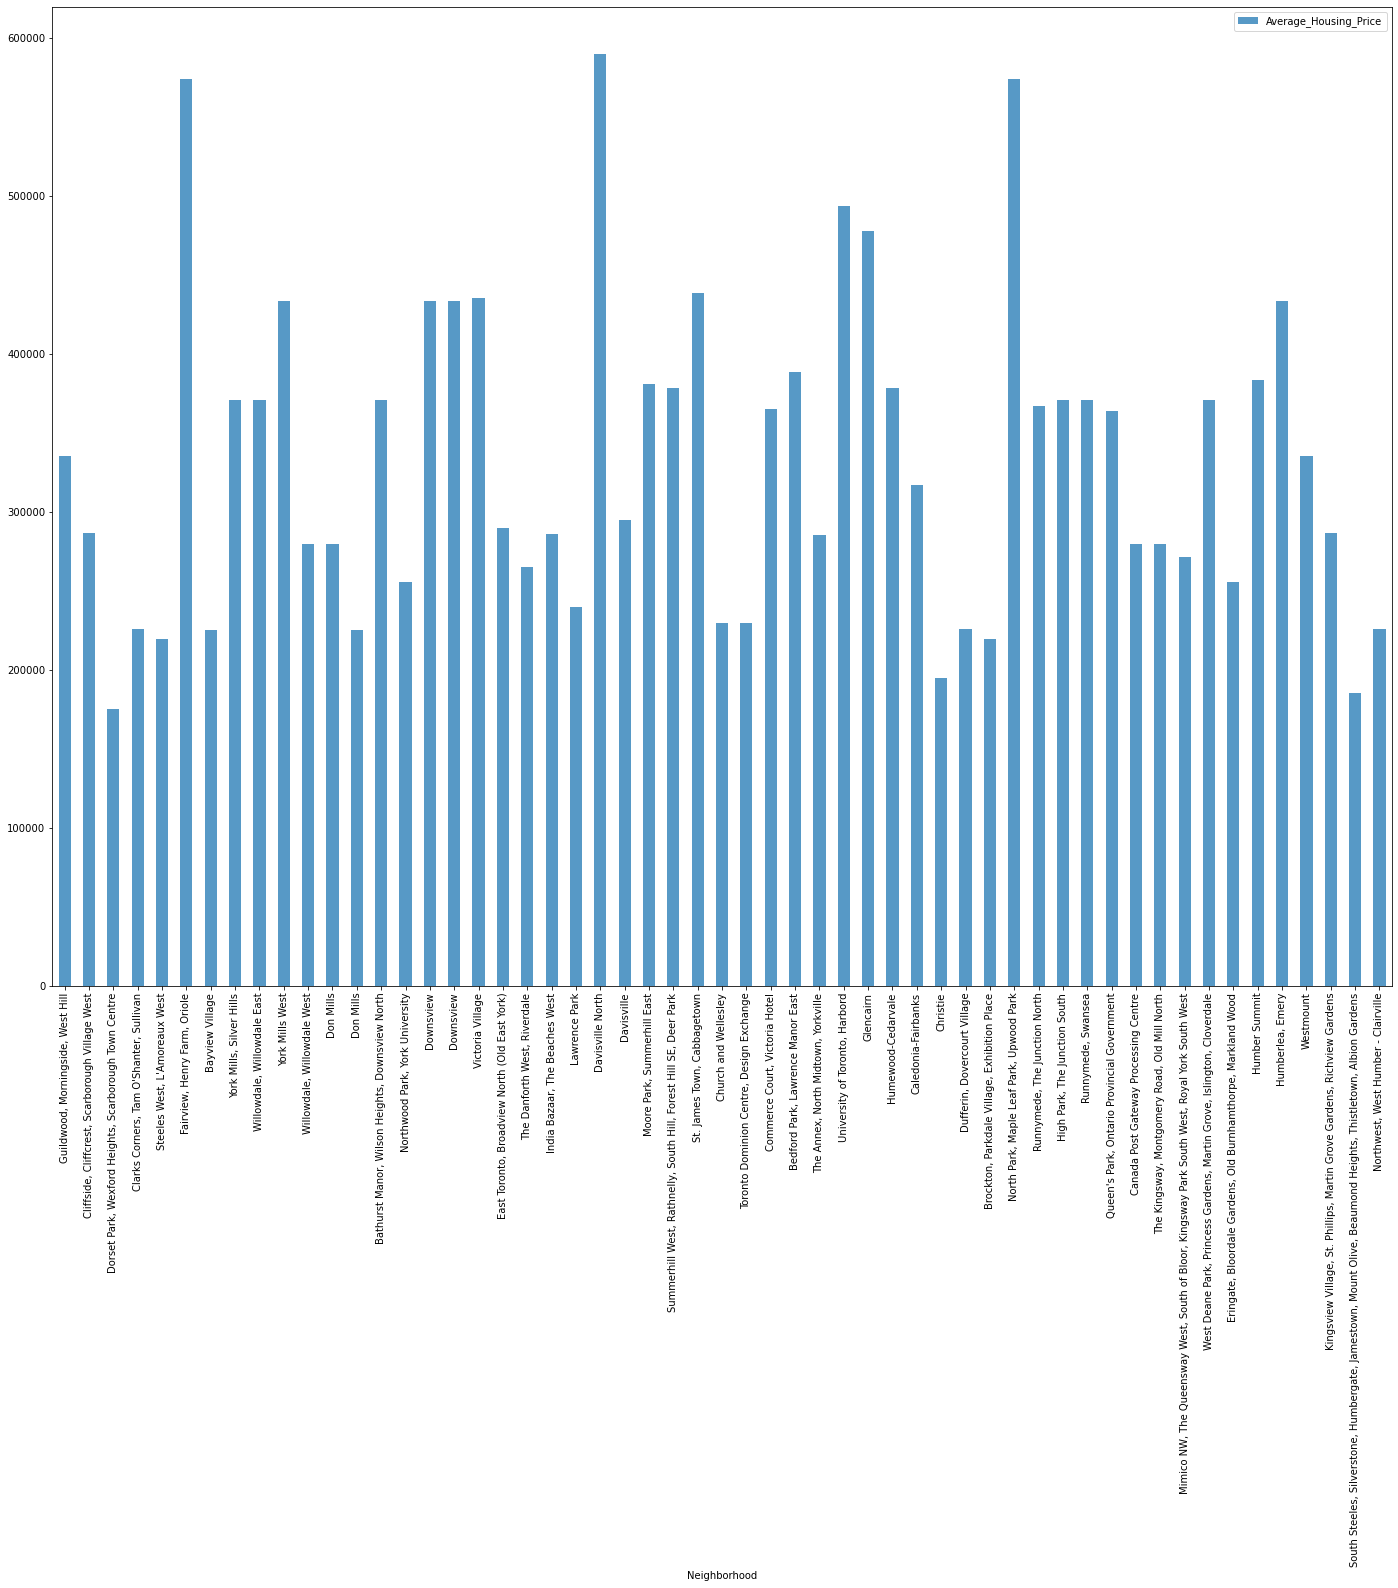

In [75]:
Scarborough_Avg_HousingPrice.plot(kind='bar',figsize=(24,18),alpha=0.75)

<h2>Schools</h2>

In [76]:
clusters=pd.DataFrame({"Cluster1":df1["Neighborhood"],
                      "Cluster2":df2["Neighborhood"],
                      "Cluster4":df3["Neighborhood"]})
clusters = clusters.replace(np.nan, '', regex=True)

In [77]:
new_Scarborough=Scarborough_merged.set_index("Neighborhood",drop=True)
#Source:https://www.greatschools.org
rating=[7,9,5,8,10,10,7,10,1,2,1,2,7,2,3,2,6,5,4,8,9,9,6,6,4,5,4,6,8,10,8,9,6,2,10,2,5,8,9,6,6,10,8,9,1,2,3,4,5,6,9,
8,5,9,6,9,6,4,8,10,2,5,6,3,9,8,7,7,8,5,8,9,1,5,4,7,2,3,6,6,9,4,8,7,4,8,9,2,6,4,7,5,10,4,6,8,9,7,5,6,5,8,7]
Scarborough_school_ratings=pd.DataFrame({"Neighborhood":df["Neighborhood"],"Top School Rating":rating[:55]})

In [78]:
Scarborough_school_ratings.set_index('Neighborhood',inplace=True,drop=True)

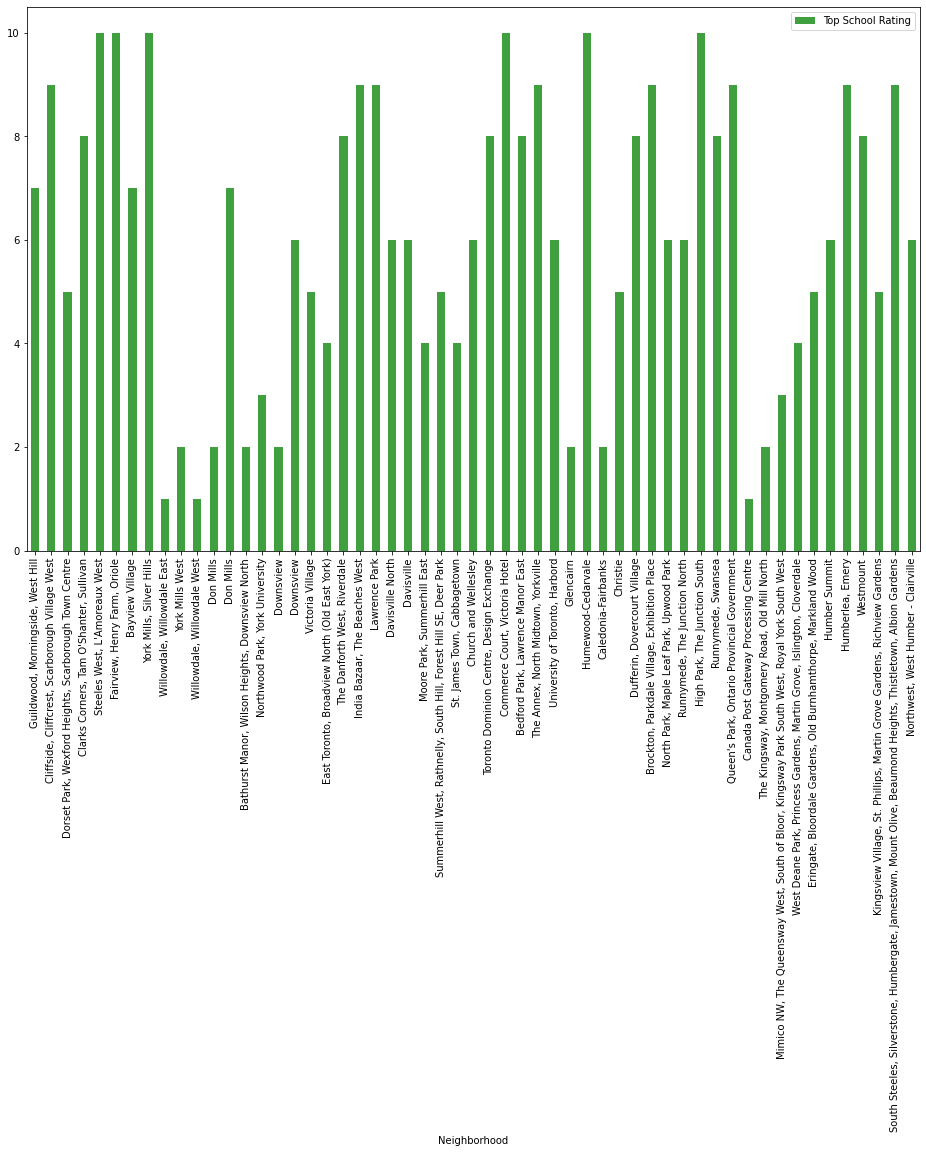

In [79]:
Scarborough_school_ratings.plot(kind='bar',figsize=(16,10),color='green',alpha=0.75)